In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('LoanData_Preprocessed_v1.1.csv')

In [23]:
data.head()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
0,41.0,17,12,176.0,9.3,11.359392,5.008608,3.0,1
1,27.0,10,6,31.0,17.3,1.362202,4.000798,1.0,0
2,40.0,15,7,NaN,5.5,0.856075,2.168925,1.0,0
3,41.0,15,14,120.0,2.9,2.658720,0.821280,NaN,0
4,24.0,2,0,28.0,17.3,1.787436,3.056564,2.0,1


In [25]:
data.tail()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
695,36.0,6,15,27.0,4.6,0.262062,0.979938,2.0,1
696,29.0,6,4,21.0,11.5,0.369495,2.045505,2.0,0
697,33.0,15,3,32.0,7.6,0.491264,1.940736,1.0,0
698,45.0,19,22,77.0,8.4,2.302608,4.165392,1.0,0
699,37.0,12,14,NaN,14.7,2.994684,3.473316,1.0,0


In [27]:
data.shape

(700, 9)

In [109]:
data = data.drop(columns=['default'], errors='ignore')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   employ    700 non-null    int64  
 2   address   700 non-null    int64  
 3   income    700 non-null    float64
 4   debtinc   700 non-null    float64
 5   creddebt  700 non-null    float64
 6   othdebt   700 non-null    float64
 7   ed        700 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 43.9 KB


In [33]:
data.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
count,680.000000,700.000000,700.000000,663.00000,700.000000,700.000000,700.000000,680.000000,700.000000
mean,34.750000,8.388571,8.268571,45.74359,10.260571,1.553553,3.058209,1.717647,0.261429
std,7.973215,6.658039,6.821609,37.44108,6.827234,2.117197,3.287555,0.925652,0.439727
min,20.000000,0.000000,0.000000,14.00000,0.400000,0.011696,0.045584,1.000000,0.000000
25%,28.000000,3.000000,3.000000,24.00000,5.000000,0.369059,1.044178,1.000000,0.000000
50%,34.000000,7.000000,7.000000,34.00000,8.600000,0.854869,1.987567,1.000000,0.000000
75%,40.000000,12.000000,12.000000,54.50000,14.125000,1.901955,3.923065,2.000000,1.000000
max,56.000000,31.000000,34.000000,446.00000,41.300000,20.561310,27.033600,5.000000,1.000000


In [77]:
data.isnull().sum()

age         20
employ       0
address      0
income      37
debtinc      0
creddebt     0
othdebt      0
ed          20
default      0
dtype: int64

In [115]:
data[['age','income','ed']] = data[['age','income','ed']].fillna(0)

In [113]:
data.duplicated().sum()

0

In [87]:
data.nunique()

age          38
employ       32
address      31
income      114
debtinc     231
creddebt    695
othdebt     699
ed            6
default       2
dtype: int64

In [117]:
data.dtypes

age         float64
employ        int64
address       int64
income      float64
debtinc     float64
creddebt    float64
othdebt     float64
ed          float64
dtype: object

In [91]:
data['income'].value_counts()
data['income'].value_counts(normalize=True) * 100

income
0.0      5.285714
21.0     3.285714
22.0     3.142857
18.0     3.000000
20.0     3.000000
           ...   
126.0    0.142857
95.0     0.142857
132.0    0.142857
157.0    0.142857
253.0    0.142857
Name: proportion, Length: 114, dtype: float64

In [ ]:
##VISUALISATION

Text(0.5, 1.0, 'Income Distribution')

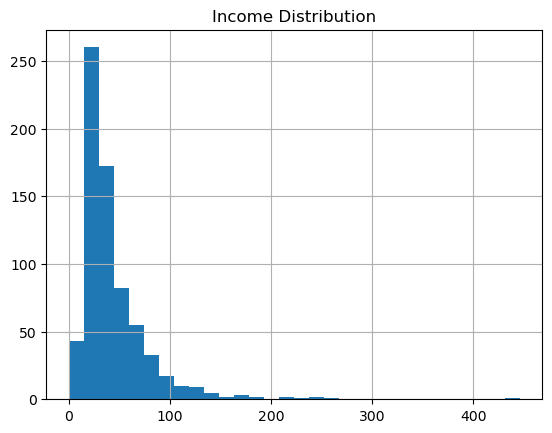

In [95]:
data['income'].hist(bins=30)
plt.title("Income Distribution")

<Axes: xlabel='ed', ylabel='count'>

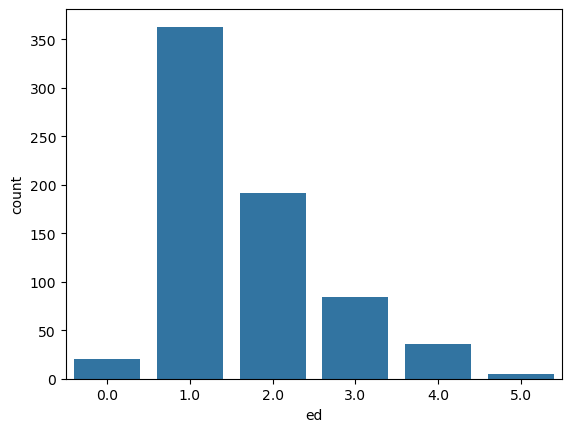

In [97]:
sns.countplot(x='ed',data=data)

<Axes: xlabel='age', ylabel='count'>

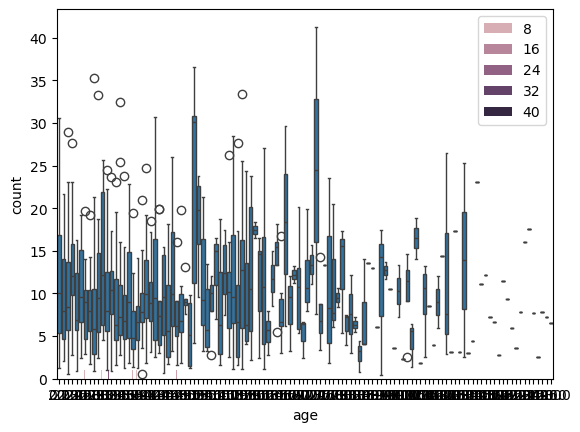

In [121]:
sns.countplot(x='age' , hue='debtinc' , data=data)
sns.boxplot(x='income' , y='debtinc' , data=data)

In [ ]:
##Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

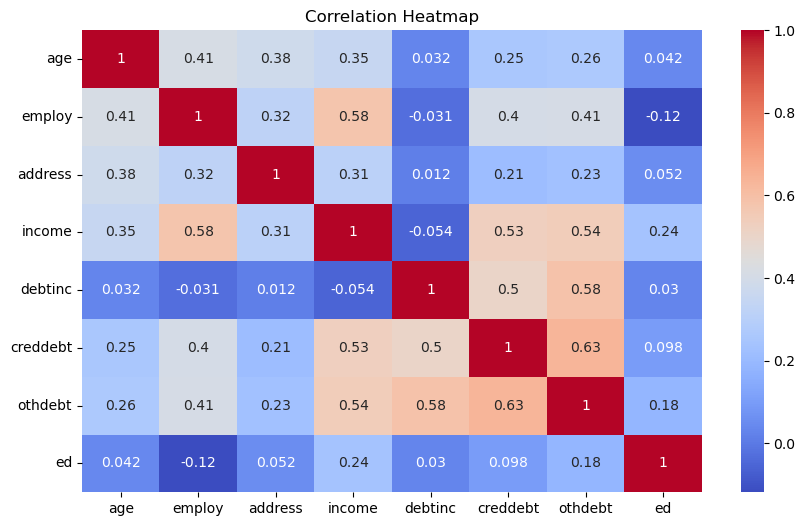

In [129]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")